<a href="https://colab.research.google.com/github/irina-lebedeva/Pytorch-Review/blob/main/Pytorch_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
# normalize images in a batch

def normalize_pic (A):
     m = A.mean(dim = (2,3))
     std = A.std(dim = (2,3))
     A = (A - m[:,:, None, None]) /  std [:,:, None, None]
     return A
    
A = torch.randint (0,256, (128, 3, 32, 32), dtype = torch.float32)
normalize_pic(A)


tensor([[[[-1.6516, -1.6516,  0.4162,  ..., -0.9979,  0.4696, -0.7311],
          [ 0.5230, -0.8645,  1.4168,  ...,  0.7497,  0.5897, -1.3047],
          [ 0.4296, -1.6116, -0.9579,  ...,  0.0427, -0.2108,  1.4835],
          ...,
          [-0.4776, -1.2380, -1.1313,  ...,  1.4701,  0.5363, -0.9178],
          [-1.4381, -0.2775, -0.9579,  ...,  1.5769, -1.4648,  1.6036],
          [ 0.0694,  1.3901, -1.3447,  ..., -0.8912, -1.0246,  1.4301]],

         [[-0.7827, -1.3450, -1.7290,  ..., -0.7416,  0.1362,  0.8630],
          [-0.5221,  0.1224,  0.9590,  ..., -0.6593,  1.7133, -1.7290],
          [-0.3850,  0.0264, -1.3039,  ...,  1.3431, -1.6605, -0.5907],
          ...,
          [-0.6867, -0.2479, -1.7290,  ...,  1.5899, -0.6319,  0.5887],
          [-1.3587,  1.4253, -1.1805,  ..., -1.0433, -1.3725,  1.4939],
          [ 0.2459, -1.5782,  1.7133,  ...,  0.8905,  0.6847,  0.2184]],

         [[-1.1710, -1.3184, -0.3130,  ..., -0.6750, -1.3989, -0.4471],
          [-0.3666,  0.0221, -

In [ ]:
# neuron example

def forward_pass(x,w):
    result  = x @ w
    result = torch.sigmoid(result)
    return result

In [ ]:
x = torch.FloatTensor([[-5,-5], [2,-3], [1,-1]])
w = torch.FloatTensor([[-0.5],[2.5]])
result  = forward_pass(x,w)
print('result: {}'.format(result))

result: tensor([[4.5398e-05],
        [2.0343e-04],
        [4.7426e-02]])


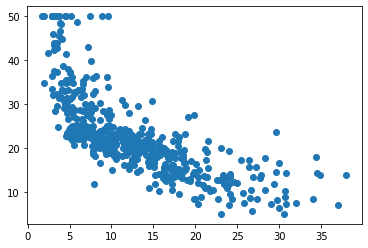

In [ ]:
# log. regression example

import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
boston = load_boston()
plt.scatter(boston.data[:,-1], boston.target)

In [ ]:
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
x = torch.tensor(boston.data[:, -1], dtype  = torch.float32)
y = torch.tensor(boston.target, dtype  = torch.float32)

yhat  = w*x + b
loss = torch.mean((y - yhat)**2)
loss.backward()

In [ ]:
from IPython.display import clear_output

for i in range(10):
    yhat  = w*x + b
    loss = torch.mean((y - yhat)**2)
    loss.backward()

    w.data -= 0.05 * w.grad.data
    b.data -= 0.05 * b.grad.data

    b.grad.data.zero_()
    w.grad.data.zero_()

    print('loss: {}'.format(loss))



loss: 592.1469116210938
loss: 456470.1875
loss: 185682896.0
loss: 75581251584.0
loss: 30764997541888.0
loss: 1.2522747024375808e+16
loss: 5.097326010764886e+18
loss: 2.0748435327016763e+21
loss: 8.445555705499588e+23
loss: 3.437724895399831e+26


In [ ]:
# neural net

N, D_in, H, D_out = 64, 3, 3, 10 

x = torch.randn(N, D_in, dtype = torch.float)
y = torch.randn(N, D_out, dtype = torch.float)
w1 = torch.randn(D_in, H, dtype = torch.float, requires_grad= True)
w2 = torch.randn(H, D_out, dtype = torch.float, requires_grad= True)


yhat = (x @ w1).clamp(min=0).matmul(w2)

loss = (y - yhat).pow(2).sum()
loss.backward()

w1 -= 0.01 * w1.grad.data
w2 -= 0.01 * w2.grad.data
w1.grad.data.zero_()
w1.grad.data.zero_()


RuntimeError: ignored

In [ ]:
from torchvision.datasets import MNIST
import torchvision.transforms as tfs

data_tfs = tfs.Compose([tfs. ToTensor(),
                        tfs. Normalize((0.5),(0.5))
])


In [ ]:
root = './'
train  = MNIST(root, train = True, transform = data_tfs, download = True)
test  = MNIST(root, train = False, transform = data_tfs, download = True)

In [ ]:
from torch.utils.data import DataLoader
batch_size  = 128
train_loader = DataLoader(train, batch_size, drop_last = True)
test_loader = DataLoader(test, batch_size, drop_last = True)
features= 784
classes = 10

epochs = 3
history = []
lr =0.001

w = torch.FloatTensor(features, classes).uniform_(-1,1) / features**0.5
w.requires_grad_()

import numpy as np
from torch.nn.functional import cross_entropy

In [ ]:
for i in range(epochs):

    for x_batch, y_batch in train_loader:
        
        x_batch = x_batch.reshape(x_batch.shape[0],-1)

        logits = x_batch @ w 

        propabilities  = torch.exp(logits) / torch.exp(logits).sum(dim = 1, keepdims = True)
        loss = -torch.log(propabilities[range(batch_size), y_batch]).mean()
        history.append(loss.item())
        loss.backward()
        grad = w.grad
        with torch.no_grad():
            w -= lr*grad
        w.grad.zero_()

        print('loss: {}'.format(loss))


loss: 2.4941470623016357
loss: 2.4410054683685303
loss: 2.4677581787109375
loss: 2.4421119689941406
loss: 2.437730312347412
loss: 2.4433186054229736
loss: 2.4255943298339844
loss: 2.468085527420044
loss: 2.3966965675354004
loss: 2.3297078609466553
loss: 2.388791561126709
loss: 2.3664298057556152
loss: 2.35149884223938
loss: 2.3042330741882324
loss: 2.3774023056030273
loss: 2.312121868133545
loss: 2.2758336067199707
loss: 2.2717125415802
loss: 2.348330020904541
loss: 2.319132089614868
loss: 2.30582332611084
loss: 2.285341501235962
loss: 2.27537202835083
loss: 2.3198108673095703
loss: 2.268178939819336
loss: 2.294846534729004
loss: 2.253688097000122
loss: 2.258481025695801
loss: 2.278045892715454
loss: 2.2563517093658447
loss: 2.269680976867676
loss: 2.2276477813720703
loss: 2.2012455463409424
loss: 2.241727352142334
loss: 2.2177159786224365
loss: 2.191671133041382
loss: 2.208951473236084
loss: 2.2617380619049072
loss: 2.206587553024292
loss: 2.230236530303955
loss: 2.1779541969299316
lo

In [ ]:
batches, acc = 0, 0
for x_batch, y_batch in test_loader:
  
  batches += 1
  x_batch = x_batch.reshape(x_batch.shape[0], -1)

  preds = torch.argmax(x_batch @ w, dim = 1)
  acc += (preds == y_batch).numpy().mean()
  result = acc/batches
print(result)

0.8475560897435898


In [ ]:
from torch import nn
criterion = nn.CrossEntropyLoss()
optimizer  = torch.optim.Adam(model.parameters())
model  = nn.Sequential(
    nn.Linear(features, 64),
    nn.ReLU(),
    nn.Linear(64, classes)
)


for i in range(epochs):
   
    for x_batch, y_batch in train_loader:
     
       x_batch = x_batch.reshape(x_batch.shape[0],-1)
       logits  = model (x_batch)
       loss = criterion(logits, y_batch)
       history.append(loss.item())
       optimizer.zero_grad()
       loss.backward()
       optimizer.step()
